In [1]:
library(SnowballC)
library(RColorBrewer)
library(wordcloud)
library(tm)

Warning message:
"package 'SnowballC' was built under R version 3.6.3"Warning message:
"package 'wordcloud' was built under R version 3.6.3"Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"

In [11]:
dataset_visual <- read.csv("../dataset/dataset_negatif.csv", header=TRUE)
corpus_negatif <- Corpus(VectorSource(dataset_visual$text))

In [12]:
# Remove specified stopwords
corpus_negatif2 <- tm_map(corpus_negatif, removeWords, c("tugas","kali","selesai","nyala","cepatbayar",
                                                         "sekal","kasih","bagus","ayan","suai","bantu",
                                                         "mudah","langgan","terimakasih","info","kalo",
                                                         "karangtanggal","murah","aplikasimaju","guys",
                                                         "hewan","intipadam","jeniskeluh","mndi","milda",
                                                         "mogakali","mulunyala","please","cepatsigap",
                                                         "heiiipln","errornya","malesan","malas","aplikasi"))

Warning message in tm_map.SimpleCorpus(corpus_negatif, removeWords, c("tugas", "kali", :
"transformation drops documents"

In [19]:
#Replace words
corpus_negatif3 <- tm_map(corpus_negatif2, gsub, pattern="layan",replacement="layanan")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="madam",replacement="padam")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="idupkan",replacement="hidupkan")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="parahplns",replacement="parah")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="semuatetangga",replacement="tetangga")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="ribetsering",replacement="sering")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="kantorkalilistrik",replacement="kantor")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="sampa",replacement="sampah")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="fiturpilih",replacement="fitur")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="penghunikosong",replacement="rumah kosong")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="biayasemogamobile",replacement="biaya")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="kalilambat",replacement="lambat")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="kantorkota",replacement="kantor kota")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="susahnyala",replacement="nyala")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="sianghidupyg",replacement="siang hidup")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="listrikpohon",replacement="pohon")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="robohdll",replacement="roboh")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="tugaslapang",replacement="petugas lapangan")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="kerjadenda",replacement="denda")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="passworddicoba",replacement="password")
corpus_negatif3 <- tm_map(corpus_negatif3, gsub, pattern="nya",replacement="jelek")

Warning message in tm_map.SimpleCorpus(corpus_negatif2, gsub, pattern = "layan", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_negatif3, gsub, pattern = "madam", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_negatif3, gsub, pattern = "idupkan", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_negatif3, gsub, pattern = "parahplns", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_negatif3, gsub, pattern = "semuatetangga", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_negatif3, gsub, pattern = "ribetsering", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_negatif3, gsub, pattern = "kantorkalilistrik", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_negatif3, gsub, pattern = "sampa", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_ne

In [20]:
#Build a term-document matrix
tdm2 <- TermDocumentMatrix(corpus_negatif3)
matrix2 <- as.matrix(tdm2)
vector2 <- sort(rowSums(matrix2), decreasing=TRUE)
data_frame2 <- data.frame(word = names(vector2), freq=vector2)
head(data_frame2, 50)

,word,freq
jelek,jelek,51
telkomsel,telkomsel,49
jaring,jaring,33
makin,makin,29
enggak,enggak,28
paket,paket,24
biasa,biasa,22
kuota,kuota,19
luar,luar,17
mahal,mahal,17


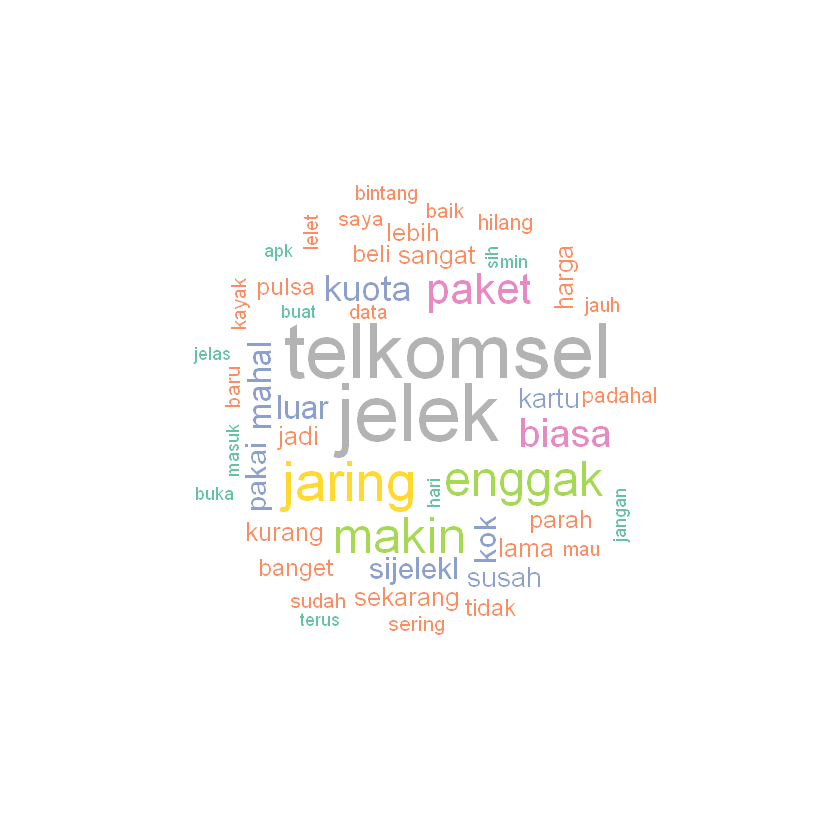

In [21]:
#Generate the Word cloud
set.seed(456)
wordcloud(words = data_frame2$word, freq = data_frame2$freq, min.freq = 1,
          max.words=50, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Set2"))

In [22]:
#Explore frequent terms and their associations
findFreqTerms(tdm2, lowfreq = 10)

[1] "sangat"    "parah"     "beli"      "enggak"    "jadi"      "kok"      
 [7] "paket"     "lama"      "pulsa"     "jelek"     "kartu"     "pakai"    
[13] "telkomsel" "sekarang"  "biasa"     "luar"      "jaring"    "kurang"   
[19] "harga"     "mahal"     "banget"    "tidak"     "lebih"     "kuota"    
[25] "makin"     "sijelekl"  "susah"

In [23]:
#Find related words
myvector2 <- as.list(findAssocs(tdm2, terms=c("mati","ganggu","padam",
                                            "susah","error"),
                               corlimit = c(0.15,0.15,0.15,0.15,0.15)))
myvector2

$mati
     games      lampu       main   walaupun internetan      masih       puas 
      1.00       1.00       1.00       1.00       0.71       0.71       0.40 
    sangat 
      0.28 

$ganggu
        suka       ajaklu     ajaribet     bangetgw    jelekbeli        sabar 
        0.53         0.44         0.44         0.44         0.44         0.44 
sistemkalian        bagai       lanjut          tak     terusgmn       sayang 
        0.44         0.44         0.44         0.44         0.44         0.44 
      simcar        siyal       anggur        butuh      jangkau      sendiri 
        0.44         0.44         0.44         0.44         0.44         0.44 
      sesuai        malam        untuk       enggak       kurang          apk 
        0.44         0.44         0.32         0.31         0.31         0.30 
       cacat       memang       tempat         tadi      padahal       sering 
        0.30         0.30         0.30         0.30         0.27         0.26 
         gue         sama       begini         mulu       kadang       kenapa 
        0.24         0.24         0.24         0.24         0.24         0.24 
    sekarang        kalau          ini         yang        kartu          kok 
        0.23         0.20         0.20         0.18         0.17         0.16 
         min         buat 
        0.16         0.16 

$padam
numeric(0)

$susah
                   buka                  minggu                    cari 
                   0.39                    0.35                    0.35 
                  benar              diperbhrui               initolong 
                   0.25                    0.25                    0.25 
                  jawab                jelekman                   kakak 
                   0.25                    0.25                    0.25 
          kebijakajelek                   kulon                 limadah 
                   0.25                    0.25                    0.25 
                  logon                 mengapa                     ooe 
                   0.25                    0.25                    0.25 
               tanggung                    tank         telkomselkenapa 
                   0.25                    0.25                    0.25 
                tengeng             trimakasihh                 wilayah 
                   0.25                    0.25                    0.25 
                  kapai          lemottelkomsel                    sial 
                   0.25                    0.25                    0.25 
                  knapa                   bonus                     hal 
                   0.25                    0.25                    0.25 
                    hpq              recomended            bagushajelek 
                   0.25                    0.25                    0.25 
                  vocer                  mehong                 simpati 
                   0.25                    0.25                    0.25 
bangeeetttsijelekljelek                 dongalx               jaringanx 
                   0.25                    0.25                    0.25 
               keonggak          pelosokmakasih         teruuuussslemot 
                   0.25                    0.25                    0.25 
                   tlng                  banget                     lah 
                   0.25                    0.20                    0.19 
                    kok               telkomsel                beberapa 
                   0.17                    0.17                    0.16 
                  tetap                    full                  tempat 
                   0.16                    0.16                    0.16 
                   atas                   sulit                internet 
                   0.16                    0.16                    0.16 
                  masih                    erti                     cek 
                   0.16                    0.16                

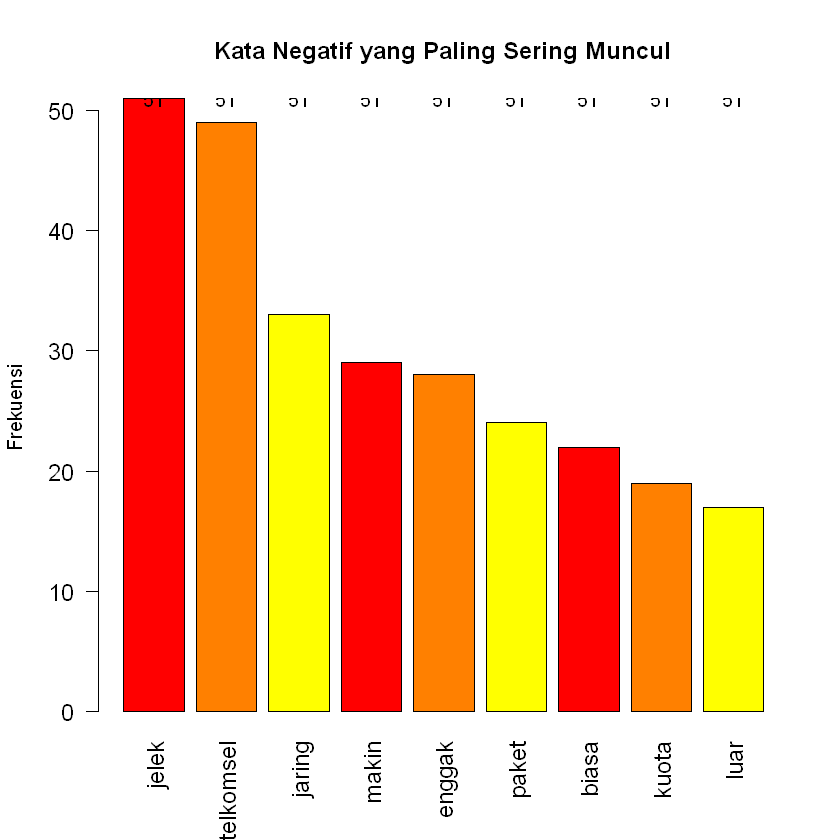

In [29]:
#barplot
k2<-barplot(data_frame2[1:9,]$freq, las = 2, names.arg = data_frame2[1:9,]$word,
           cex.axis=1.2,cex.names=1.2,
           main ="Kata Negatif yang Paling Sering Muncul",
           ylab = "Frekuensi",col = heat.colors(3))
termFrequency2 <- rowSums(as.matrix(tdm2))
termFrequency2 <- subset(termFrequency2, termFrequency2>50)
text(k2, sort(termFrequency2, decreasing = TRUE),
     labels=sort(termFrequency2, decreasing = T),pch=6, cex=1)